In [ ]:
# Copyright 2024 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Supervised Fine Tuning with Gemini 1.5 Flash for change detection using the Google GenAI SDK

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/tuning/gen_ai_sdk_supervised_finetuning_using_gemini_on_multiple_images.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Ftuning%2Fgen_ai_sdk_supervised_finetuning_using_gemini_on_multiple_images.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/tuning/gen_ai_sdk_supervised_finetuning_using_gemini_on_multiple_images.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/tuning/gen_ai_sdk_supervised_finetuning_using_gemini_on_multiple_images.ipynb">
      <img width="32px" src="https://upload.wikimedia.org/wikipedia/commons/9/91/Octicons-mark-github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/tuning/gen_ai_sdk_supervised_finetuning_using_gemini_on_multiple_images.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/tuning/gen_ai_sdk_supervised_finetuning_using_gemini_on_multiple_images.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/tuning/gen_ai_sdk_supervised_finetuning_using_gemini_on_multiple_images.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/53/X_logo_2023_original.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/tuning/gen_ai_sdk_supervised_finetuning_using_gemini_on_multiple_images.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/tuning/gen_ai_sdk_supervised_finetuning_using_gemini_on_multiple_images.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| | |
|-|-|
| Author(s) |  [Ivan Nardini](https://github.com/inardini) |
[Erwin Huizenga](https://github.com/erwinh85)

## Overview

Fine-tuning Gemini on image data using supervised learning lets you specializing Gemini models for several vision tasks including visual inspection where you want to train a model to identify specific objects or defects either within or between images.

This notebook demonstrates how to fine-tune the Gemini 1.5 Pro model for change detection task (spot differences) with the Vertex AI Supervised Tuning feature using multiple images and text as inputs.


### Dataset

Dataset used is a modified subsample of the [Spot-the-diff dataset](https://github.com/harsh19/spot-the-diff/tree/master), introduced by Jhamtani et al. in Learning to Describe Differences Between Pairs of Similar Images.

```
@inproceedings{jhamtani2018learning,
  title={Learning to Describe Differences Between Pairs of Similar Images},
  author={Jhamtani, Harsh and Berg-Kirkpatrick, Taylor},
  booktitle={Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing (EMNLP)},
  year={2018}
}
```


## Get started

### Install Google GenAI SDK and other required packages
The new Google Gen AI SDK provides a unified interface to Gemini through both the Gemini Developer API and the Gemini API on Vertex AI. With a few exceptions, code that runs on one platform will run on both. This means that you can prototype an application using the Developer API and then migrate the application to Vertex AI without rewriting your code.


In [ ]:
%pip install --upgrade --user --quiet google-cloud-aiplatform etils google-genai

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. In Colab or Colab Enterprise, you might see an error message that says "Your session crashed for an unknown reason." This is expected. Wait until it's finished before continuing to the next step. ⚠️</b>
</div>


### Authenticate your notebook environment (Colab only)

If you're running this notebook on Google Colab, run the cell below to authenticate your environment.

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Set Google Cloud project information and initialize the Google GenAI SDK

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [ ]:
# Use the environment variable if the user doesn't provide Project ID.
import os

from google import genai
from google.genai import types
import vertexai

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

REGION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

BUCKET_NAME = "[your-bucket-name]"  # @param {type:"string"}
BUCKET_URI = f"gs://{BUCKET_NAME}"

vertexai.init(project=PROJECT_ID, location=REGION, staging_bucket=BUCKET_URI)

client = genai.Client(vertexai=True, project=PROJECT_ID, location=REGION)

### Create a Cloud Storage bucket

Only run the code below if you want to create a new Google Cloud Storage bucket.

In [ ]:
# ! gsutil mb -l {REGION} -p {PROJECT_ID} {BUCKET_URI}

### Import libraries

In [ ]:
from io import BytesIO

# General
import json
import random
import time
from typing import Any

from PIL import Image
from etils.epath import Path

# For model evaluation.
import matplotlib.pyplot as plt
import numpy as np

# For model fine tuning.

### Set constants

In [ ]:
INPUT_SOURCE_DATA_URI = "gs://github-repo/tuning/data"
INPUT_DATA_URI = f"{BUCKET_URI}/data"
MODEL_ID = "gemini-1.5-flash-002"  # @param {type:"string", isTemplate: true}

SYSTEM_INSTRUCTION = """You are an expert in "spot the difference" games. Your task is to analyze two images and identify their differences.
        Instructions:
        1. Carefully examine the two provided images.
        2. List the differences you find between the two images in a clear and concise manner, using bullet points.  For example:
            * "The color of the car in image 1 is red, while in image 2 it is blue."
            * "The house in image 1 has a chimney, but the house in image 2 does not."
        3. If the images are identical, output: "no difference between two images"
    """.strip()

TASK_PROMPT = "Compare the two images and find differences."

### Set helpers

In [ ]:
def save_jsonlines(instances: list[dict[str, Any]], file_path: str) -> None:
    """
    Saves a list of JSON-serializable instances to a jsonlines file.
    """
    try:
        bucket_path = Path(file_path)
        with bucket_path.open("w") as f:
            for i, instance in enumerate(instances):
                try:
                    json.dump(instance, f, ensure_ascii=False)
                    f.write("\n")
                except (TypeError, ValueError) as e:
                    raise TypeError(f"Failed to serialize instance at index {i}: {e}")
    except Exception as e:
        raise OSError(f"Failed to write to {file_path}: {e}")


def create_tuning_samples(file_path: str, split: str = "train") -> list[dict[str, Any]]:
    """
    Creates tuning samples from a jsonlines file for image comparison tasks.
    """

    bucket_path = Path(file_path)
    instances = []

    # Read and parse the jsonlines file
    with bucket_path.open() as f:
        content = f.read()
        data = [
            json.loads(line) for line in content.strip().split("\n") if line.strip()
        ]

    # Process each instance
    for obj in data:
        image_path = f"{bucket_path.parent}/{split}/{obj['img_id']}"
        instance = {
            "systemInstruction": {
                "role": "string",
                "parts": [{"text": SYSTEM_INSTRUCTION}],
            },
            "contents": [
                {
                    "role": "user",
                    "parts": [
                        {
                            "fileData": {
                                "mimeType": "image/png",
                                "fileUri": f"{image_path}.png",
                            }
                        },
                        {"text": "Image 1."},
                        {
                            "fileData": {
                                "mimeType": "image/png",
                                "fileUri": f"{image_path}_2.png",
                            }
                        },
                        {"text": "Image 2."},
                        {"text": TASK_PROMPT},
                    ],
                },
                {"role": "model", "parts": [{"text": obj["sentences"]}]},
            ],
        }
        instances.append(instance)
    return instances


def sample_test(input_test_file_path: str) -> dict[str, Any]:
    """
    Random sample one image_id and its data from a jsonlines file.
    """
    bucket_path = Path(input_test_file_path)

    with bucket_path.open() as f:
        content = f.read()
        data = [
            json.loads(line) for line in content.strip().split("\n") if line.strip()
        ]

    # Randomly select one instance
    sampled_instance = random.choice(data)
    return sampled_instance


def plot_images_from_uri(image_one_uri: str | Path, image_two_uri: str | Path) -> None:
    """
    Plot two images side by side from their URIs using etils for cloud storage support.
    """

    def load_image(uri):
        path = Path(uri)
        with path.open("rb") as f:
            img_data = f.read()
            img = Image.open(BytesIO(img_data))
            # Convert to RGB if image is in RGBA format
            if img.mode == "RGBA":
                img = img.convert("RGB")
            return np.array(img)

    # Create figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Load and display first image
    img1 = load_image(image_one_uri)
    ax1.imshow(img1)
    ax1.axis("off")
    ax1.set_title("Image 1")

    # Load and display second image
    img2 = load_image(image_two_uri)
    ax2.imshow(img2)
    ax2.axis("off")
    ax2.set_title("Image 2")

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

## Prepare your multimodal data with multiple inputs

According to the [Prepare supervised fine-tuning data for Gemini models](https://cloud.google.com/vertex-ai/generative-ai/docs/models/gemini-supervised-tuning-prepare) documentation, the model tuning dataset must be in the JSON Lines (JSONL) format, where each line contains a single tuning example.

With multiple multimodal inputs, you have the following JSONL structure:

```
{
   "systemInstruction":{
      "role":"string",
      "parts":[
         {
            "text":"Say something to the model."
         }
      ]
   },
   "contents":[
      {
         "role":"user",
         "parts":[
            {
               "fileData":{
                  "mimeType":"image/png",
                  "fileUri":"gs://path/to/image1"
               }
            },
            {
               "text":"This is the image 1"
            },
            {
               "fileData":{
                  "mimeType":"image/png",
                  "fileUri":"gs://path/to/image2"
               }
            },
            {
               "text":"This is the image 2"
            },
            {
               "text":"Do something with image 1 and image 2."
            }
         ]
      },
      {
         "role":"model",
         "parts":[
            {
               "text":""
            }
         ]
      }
   ]
}
```


### Replicate the multimodal dataset in your bucket

Create a copy of the tutorial dataset in your bucket.

In [ ]:
! gsutil -m -q cp -n -r {INPUT_SOURCE_DATA_URI} {INPUT_DATA_URI}

### Prepare the training dataset

For each sample in the original JSONL train file, prepare the tuning instance.
Then save training instances in the new JSONL train file.

In [ ]:
input_train_file_path = Path(INPUT_DATA_URI) / "train.jsonl"
output_train_file_path = Path(INPUT_DATA_URI) / "prepared_train.jsonl"

train_instances = create_tuning_samples(input_train_file_path)
save_jsonlines(train_instances, output_train_file_path)

### Prepare the val dataset

For each sample in the original JSONL val file, prepare the val instance.
Then save val instances in the new JSONL val file.

In [ ]:
input_val_file_path = Path(INPUT_DATA_URI) / "val.jsonl"
output_val_file_path = Path(INPUT_DATA_URI) / "prepared_val.jsonl"

val_instances = create_tuning_samples(input_val_file_path, split="val")
save_jsonlines(train_instances, output_val_file_path)

## Tune Gemini model by using supervised fine-tuning

You can create a supervised fine-tuning job by using the Google GenAI SDK for Python.

While Vertex AI Tuning offers customizable hyperparameters, we recommend using the default settings for optimal performance—these are rigorously tested and ideal for initial runs. Advanced users can adjust these parameters to meet specific needs.

[Check out the documentation](https://cloud.google.com/vertex-ai/generative-ai/docs/models/gemini-use-supervised-tuning#tuning_hyperparameters) to learn more.


#### Create a tuning job

Start the tuning job with its default configuration.

In [ ]:
train_dataset = str(Path(INPUT_DATA_URI) / "prepared_train.jsonl")
validation_dataset = str(Path(INPUT_DATA_URI) / "prepared_val.jsonl")

training_dataset = {
    "gcs_uri": train_dataset,
}

validation_dataset = types.TuningValidationDataset(gcs_uri=validation_dataset)

In [ ]:
tuned_model_display_name = "spot-the-difference-tuning-job"  # @param {type:"string"}

sft_tuning_job = client.tunings.tune(
    base_model=MODEL_ID,
    training_dataset=training_dataset,
    config=types.CreateTuningJobConfig(
        adapter_size="ADAPTER_SIZE_EIGHT",
        epoch_count=1,  # set to one to keep time and cost low
        tuned_model_display_name=tuned_model_display_name,
    ),
)
sft_tuning_job

⚠️ It will take ~30 mins for the model tuning job to complete on the provided dataset and set configurations/hyperparameters. ⚠️

In [ ]:
tuning_job = client.tunings.get(name=sft_tuning_job.name)
tuning_job

#### Monitor the tuning job

Check the tuning job's progress.

In [ ]:
import time

running_states = {
    "JOB_STATE_PENDING",
    "JOB_STATE_RUNNING",
}

while sft_tuning_job.state in running_states:
    print(sft_tuning_job.state)
    tuning_job = client.tunings.get(name=sft_tuning_job.name)
    time.sleep(10)

### Get some tuning job details

Following a successful tuning run, retrieve the registered model's resource name and the deployed tuned model's endpoint.

In [ ]:
tuned_model_endpoint_name = tuning_job.tuned_model.endpoint
tuning_experiment_name = sft_tuning_job.experiment

print("Tuned model experiment", tuning_experiment_name)
print("Tuned model endpoint resource name:", tuned_model_endpoint_name)

Tuned model experiment None
Tuned model endpoint resource name: projects/801452371447/locations/us-central1/endpoints/2471008347403321344


## Qualitatively evaluate the tuned model

Assess the tuned model's performance in spotting differences between the two new images within this multimodal, multi-input context. In this simple tutorial, a qualitative analysis is sufficient.


#### Extract a random sample

Draw a random image.

In [ ]:
input_test_file_path = Path(INPUT_DATA_URI) / "test.jsonl"
test_sample = sample_test(input_test_file_path)

#### Prepare the image paths

Specify the image paths for comparative analysis.

In [ ]:
input_image_one_uri = Path(INPUT_DATA_URI) / "test" / f"{test_sample['img_id']}.png"
input_image_two_uri = Path(INPUT_DATA_URI) / "test" / f"{test_sample['img_id']}_2.png"

### Plot image samples

Look at the sampled images.

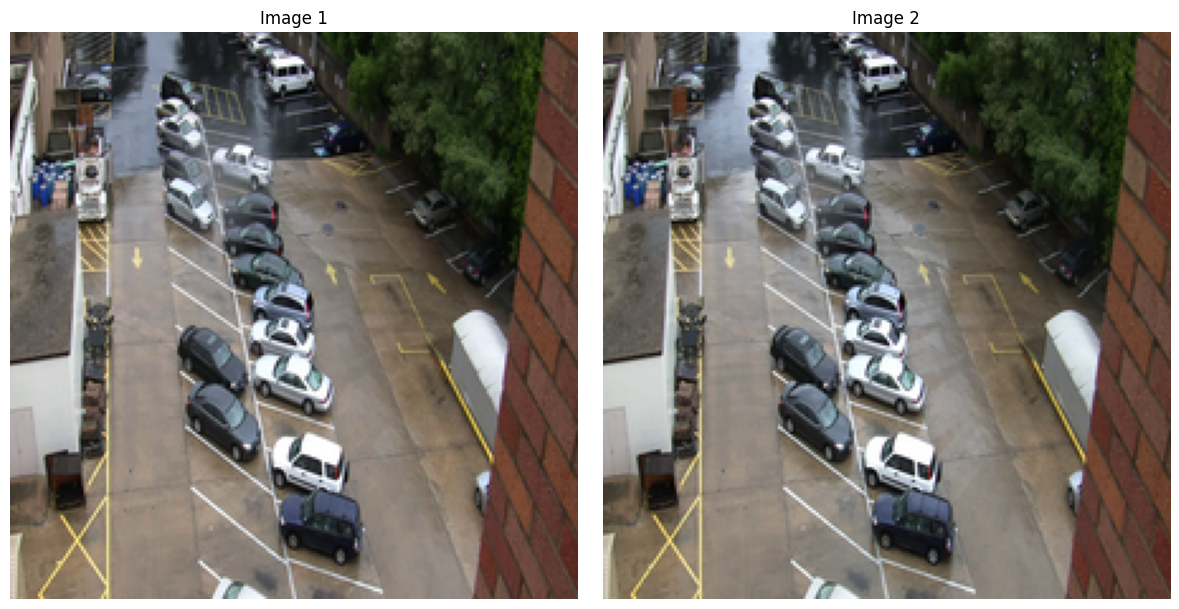

In [ ]:
plot_images_from_uri(input_image_one_uri, input_image_two_uri)

#### Generate the prediction

Make a prediction with the tuned model.

In [ ]:
tuned_model = tuning_job.tuned_model.endpoint

contents = [
    "Image 1:",
    types.Part.from_uri(file_uri=str(input_image_one_uri), mime_type="image/jpeg"),
    "Image 2:",
    types.Part.from_uri(file_uri=str(input_image_two_uri), mime_type="image/jpeg"),
]

response = client.models.generate_content(
    model=tuned_model,
    contents=contents,
    config={
        "temperature": 0,
    },
)

response

#### Compare the ground truth with the new answer from tuned model

Assess the accuracy of the tuned model's response by comparing it to the ground truth.

In [ ]:
print("Ground truth answer:", test_sample["sentences"])
print("Generated answer with fine-tuned model:", response.text.strip())